In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
#고객별 속성 데이터
#cusno, gender, age, region

# cusno : 1 ~ 1000 고객 번호
# gender : 0,1 정수 난수 생성
# age : 0 ~ 80사이 정수 난수 생성
# region : 1 ~ 10 사이 정수 난수 생성

# customer_df = pd.DataFrame(columns=('cusno', 'gender', 'age', 'region'))
random.seed(10)
cusno = pd.Series(np.arange(1, 1001))
gender = pd.Series(np.random.choice([0,1],1000))
age = pd.Series(np.random.uniform(10,81,1000).astype(int))
region = pd.Series(np.random.uniform(1,11,1000).astype(int))

customer_df = pd.concat([cusno, gender, age, region],axis=1)
customer_df.columns = ['cusno', 'gender', 'age', 'region']
customer_df

,cusno,gender,age,region
0,1,1,75,10
1,2,1,38,8
2,3,1,38,9
3,4,1,25,9
4,5,1,35,6
...,...,...,...,...
995,996,1,46,6
996,997,1,12,4
997,998,0,74,1
998,999,1,12,3


In [3]:
#트랜잭션 데이터 프레임

#트랜잭션 넘버 ok
t_no = pd.Series(random.sample(list(range(10000,50000)),10000))

raw_date = pd.date_range(start='2020-01-01',end='2021-12-31',periods=1000)
dates_only = raw_date.strftime('%Y-%m-%d').tolist()
#date ok
date = pd.Series(dates_only)
# day = pd.Series(raw_date.dayofweek)  나중에
# product_20 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10 ~ 30
# 거래 id ok
id = pd.Series(np.random.uniform(1,1001,1000)).astype(int)
#품목 ok
product = pd.Series(np.random.choice([10,20,30],10000))

# product21 = np.random.choice([10,20,30])
# price_20 : 1000 ~ 50000 사이 실수 난수 생성
#가격 ok
price = pd.Series(np.random.uniform(1000, 50001, 10000))
# price_21 = pd.Series(np.random.uniform(1000, 50000))
#수량 ok
quantity = pd.Series(np.random.uniform(1,101, 10000)).astype(int)
# quantity_21 = pd.Series(np.random.randint(1,101))
#시간 ok
time = pd.Series(np.random.uniform(1,25, 10000)).astype(int)
# time_21 = pd.Series(np.random.randint(1,25))

amount = price * quantity
# amount_21 = price_21 * quantity_21

# customer_df = pd.concat([id, gender, age, region],axis=1)

In [4]:
id = pd.Series(np.random.uniform(1,1001,1000)).astype(int)
print(id)

0      739
1      788
2      752
3      793
4       69
      ... 
995    168
996    866
997    475
998    255
999    427
Length: 1000, dtype: int64


In [5]:
#트랜잭션 데이터 프레임

t_no = pd.Series(np.arange(1, 10001))

date_list = list(pd.date_range('2020-01-01','2021-12-31',freq='D'))

#date ok
date = pd.Series(np.random.choice(date_list, size=10000))
#요일
day = date.apply(lambda x: x.weekday())
day = day.replace(list(range(7)), ['월','화','수','목','금','토','일'])
# cusno ok
cusno = pd.Series(np.random.randint(1,1001,size=10000))
#품목 ok
product = pd.Series(np.random.choice([10,20,30],10000))
#가격 ok
price = pd.Series(np.random.uniform(1000, 50001, 10000))
#수량 ok
quantity = pd.Series(np.random.uniform(1,101, 10000)).astype(int)
#시간 ok
time = pd.Series(np.random.uniform(1,25, 10000)).astype(int)

tran_df = pd.concat([t_no,date,day,time,cusno,product,price,quantity],axis=1)
tran_df.columns = ['t_no','date','day','time','cusno','product','price','quantity']
tran_df

,t_no,date,day,time,cusno,product,price,quantity
0,1,2021-02-07,일,16,624,20,11653.032822,41
1,2,2021-05-26,수,7,5,30,17717.519406,55
2,3,2020-09-27,일,8,735,30,33033.211416,60
3,4,2021-11-24,수,19,910,30,3216.382875,16
4,5,2021-08-01,일,22,44,30,25582.144078,59
...,...,...,...,...,...,...,...,...
9995,9996,2020-02-22,토,13,491,20,44700.147811,6
9996,9997,2020-09-05,토,8,433,20,3181.374307,96
9997,9998,2021-11-16,화,14,33,10,13242.360832,36
9998,9999,2020-10-14,수,21,141,30,28606.906978,35


In [6]:
print(pd.merge( tran_df, customer_df, on='cusno'))

      t_no       date day  time  cusno  product         price  quantity  \
0        1 2021-02-07   일    16    624       20  11653.032822        41   
1       77 2020-08-16   일    12    624       20  23293.475249        54   
2     3575 2021-05-15   토     5    624       10   6038.647338        36   
3     4105 2020-05-04   월     9    624       30  34054.276707        34   
4     4653 2020-05-20   수     7    624       30   4808.913544        84   
...    ...        ...  ..   ...    ...      ...           ...       ...   
9995  8953 2020-05-28   목     7    926       20  36931.936236        96   
9996  9435 2021-07-14   수    24    926       30  48932.981056        58   
9997  6618 2020-10-28   수     8    498       20  48620.008363        17   
9998  6691 2020-07-16   목    20    498       30  37324.049188        73   
9999  6746 2021-11-24   수    22    498       20   5466.090228        69   

      gender  age  region  
0          1   33       2  
1          1   33       2  
2          1   

#### Q1. 고객 속성(id, 성별, 연령, 거주지역) 데이터와 거래 데이터를 통합한 데이터 프레임 df를 생성하세요.

In [7]:
import pandas as pd
import numpy as np
import random

random.seed(10)
cusno = pd.Series(np.arange(1, 1001))
gender = pd.Series(np.random.choice([0,1],1000))
age = pd.Series(np.random.uniform(10,81,1000).astype(int))
region = pd.Series(np.random.uniform(1,11,1000).astype(int))

customer_df = pd.concat([cusno, gender, age, region],axis=1)
customer_df.columns = ['cusno', 'gender', 'age', 'region']

#트랜잭션 데이터 프레임
t_no = pd.Series(np.arange(1, 10001))

date_list = list(pd.date_range('2020-01-01','2021-12-31',freq='D'))

#date ok
date = pd.Series(np.random.choice(date_list, size=10000))
#요일
day = date.apply(lambda x: x.weekday())
day = day.replace(list(range(7)), ['월','화','수','목','금','토','일'])
# cusno ok
cusno = pd.Series(np.random.randint(1,1001,size=10000))
#품목 ok
product = pd.Series(np.random.choice([10,20,30],10000))
#가격 ok
price = pd.Series(np.random.uniform(1000, 50001, 10000)).round(2)
#수량 ok
quantity = pd.Series(np.random.uniform(1,101, 10000)).astype(int)
#시간 ok
time = pd.Series(np.random.uniform(1,25, 10000)).astype(int)
#amount ok
amount=pd.Series(price*quantity)

tran_df = pd.concat([t_no,date,day,time,cusno,product,price,quantity,amount],axis=1)
tran_df.columns = ['t_no','date','day','time','cusno','product','price','quantity','amount']

print(pd.merge( tran_df, customer_df, on='cusno'))
df = pd.merge( tran_df, customer_df, on='cusno')

      t_no       date day  time  cusno  product     price  quantity  \
0        1 2021-11-30   화    22    201       30  18447.20        10   
1        8 2020-12-28   월     9    201       30  22539.48        88   
2     1195 2021-07-20   화    19    201       30  31749.39        36   
3     2928 2021-09-11   토     8    201       30  31237.43        84   
4     3217 2021-01-09   토    19    201       30   4219.59        70   
...    ...        ...  ..   ...    ...      ...       ...       ...   
9995  8305 2021-11-21   일    22    334       20  23507.67         1   
9996  8459 2020-07-06   월     8    334       30  29228.00        71   
9997  9082 2021-03-27   토    10    334       10   8596.08        36   
9998  9282 2021-02-21   일    23    334       30   4504.48        49   
9999  9824 2020-11-13   금     3    152       10  42657.04        90   

          amount  gender  age  region  
0      184472.00       0   36       7  
1     1983474.24       0   36       7  
2     1142978.04       0   

#### Q2. df를 수정하여 5가지 이상의 인사이트를 포함한 데이터 셋으로 변환하세요

In [8]:
#인사이트 1
#1시부터 7시까지 구매수량 50% 감소

def adjust_quantity(row):
    if 1 <= row['time'] < 7:
        row['quantity'] *= 0.5
    return row

df = df.apply(adjust_quantity, axis=1)

In [9]:
#인사이트 2
#60대 이상 구매 수량 50% 감소

def age_adjust_quantity(row):
    if  row['age'] >= 60:
        row['quantity'] *= 0.5
    return row

df = df.apply(age_adjust_quantity, axis=1)

In [10]:
#인사이트 3
#여성이 남성보다 구매수량 1.2배

def woman_adjust_quantity(row):
    if  row['gender'] == 1:
        row['quantity'] *= 1.2
    return row

df = df.apply(age_adjust_quantity, axis=1)

In [11]:
#인사이트 4
#16세 이하 매출액 70% 감소

def chidren_adjust_quantity(row):
    if  row['age'] <= 16:
        row['quantity'] *= 0.3
    return row

df = df.apply(age_adjust_quantity, axis=1)

In [12]:
#인사이트 5
#구입액 상위 10% 인원이 구매수량 2배 더 많음

def top_quantity(row, threshold):
    if row['amount'] > threshold:
        row['quantity'] *= 2
    return row

# 상위 10% 기준값 계산
threshold = df['amount'].quantile(0.90)

df = df.apply(lambda row: top_quantity(row, threshold), axis=1)


In [13]:
import pandas as pd
import numpy as np
import random

random.seed(10)
cusno = pd.Series(np.arange(1, 1001))
gender = pd.Series(np.random.choice([0,1],1000))
age = pd.Series(np.random.uniform(10,81,1000).astype(int))
region = pd.Series(np.random.uniform(1,11,1000).astype(int))

customer_df = pd.concat([cusno, gender, age, region],axis=1)
customer_df.columns = ['cusno', 'gender', 'age', 'region']

#트랜잭션 데이터 프레임
t_no = pd.Series(np.arange(1, 10001))

date_list = list(pd.date_range('2020-01-01','2021-12-31',freq='D'))

#date ok
date = pd.Series(np.random.choice(date_list, size=10000))
#요일
day = date.apply(lambda x: x.weekday())
day = day.replace(list(range(7)), ['월','화','수','목','금','토','일'])
# cusno ok
cusno = pd.Series(np.random.randint(1,1001,size=10000))
#품목 ok
product = pd.Series(np.random.choice([10,20,30],10000))
#가격 ok
price = pd.Series(np.random.uniform(1000, 50001, 10000)).round(2)
#수량 ok
quantity = pd.Series(np.random.uniform(1,101, 10000)).astype(int)
#시간 ok
time = pd.Series(np.random.uniform(1,25, 10000)).astype(int)
#amount ok
amount=pd.Series(price*quantity)

tran_df = pd.concat([t_no,date,day,time,cusno,product,price,quantity,amount],axis=1)
tran_df.columns = ['t_no','date','day','time','cusno','product','price','quantity','amount']

print(pd.merge( tran_df, customer_df, on='cusno'))
df = pd.merge( tran_df, customer_df, on='cusno')

def adjust_quantity(row):
    if 1 <= row['time'] < 7:
        row['quantity'] *= 0.5
    return row

df = df.apply(adjust_quantity, axis=1)

def age_adjust_quantity(row):
    if  row['age'] >= 60:
        row['quantity'] *= 0.5
    return row

df = df.apply(age_adjust_quantity, axis=1)

def woman_adjust_quantity(row):
    if  row['gender'] == 1:
        row['quantity'] *= 1.2
    return row

df = df.apply(woman_adjust_quantity, axis=1)

def chidren_adjust_quantity(row):
    if  row['age'] <= 16:
        row['quantity'] *= 0.3
    return row

df = df.apply(chidren_adjust_quantity, axis=1)

def top_quantity(row, threshold):
    if row['amount'] > threshold:
        row['quantity'] *= 2
    return row

threshold = df['amount'].quantile(0.90)

df = df.apply(lambda row: top_quantity(row, threshold), axis=1)

df['amount'] = df['price'] * df['quantity']
df

      t_no       date day  time  cusno  product     price  quantity  \
0        1 2020-07-13   월    23    966       10   7255.62        69   
1      477 2021-04-03   토    19    966       20  22547.86        15   
2      932 2020-07-31   금    22    966       20  39087.77        49   
3     1101 2020-07-11   토     2    966       30  36348.19        76   
4     3195 2020-08-30   일    10    966       10  39855.50        22   
...    ...        ...  ..   ...    ...      ...       ...       ...   
9995  7179 2021-09-26   일    12    309       20  40215.38        80   
9996  7360 2021-03-09   화    16    309       20  32034.46        69   
9997  8906 2021-07-28   수    17    309       20   7463.75        20   
9998  7887 2020-01-05   일    15    557       10  36434.92        10   
9999  8997 2021-09-28   화    18    557       10  39346.52        27   

          amount  gender  age  region  
0      500637.78       0   74       5  
1      338217.90       0   74       5  
2     1915300.73       0   

,t_no,date,day,time,cusno,product,price,quantity,amount,gender,age,region
0,1,2020-07-13,월,23,966,10,7255.62,34.5,250318.890,0,74,5
1,477,2021-04-03,토,19,966,20,22547.86,7.5,169108.950,0,74,5
2,932,2020-07-31,금,22,966,20,39087.77,24.5,957650.365,0,74,5
3,1101,2020-07-11,토,2,966,30,36348.19,19.0,690615.610,0,74,5
4,3195,2020-08-30,일,10,966,10,39855.50,11.0,438410.500,0,74,5
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7179,2021-09-26,일,12,309,20,40215.38,192.0,7721352.960,1,21,7
9996,7360,2021-03-09,화,16,309,20,32034.46,82.8,2652453.288,1,21,7
9997,8906,2021-07-28,수,17,309,20,7463.75,24.0,179130.000,1,21,7
9998,7887,2020-01-05,일,15,557,10,36434.92,10.0,364349.200,0,35,1


#### Q3. df 를 탐색적 분석을 통하여 인사이트를 도출하세요.

In [14]:
df['year'] = df['date'].apply(lambda x : x.year)
df.head()

,t_no,date,day,time,cusno,product,price,quantity,amount,gender,age,region,year
0,1,2020-07-13,월,23,966,10,7255.62,34.5,250318.890,0,74,5,2020
1,477,2021-04-03,토,19,966,20,22547.86,7.5,169108.950,0,74,5,2021
2,932,2020-07-31,금,22,966,20,39087.77,24.5,957650.365,0,74,5,2020
3,1101,2020-07-11,토,2,966,30,36348.19,19.0,690615.610,0,74,5,2020
4,3195,2020-08-30,일,10,966,10,39855.50,11.0,438410.500,0,74,5,2020


In [15]:
grouped_product = df.groupby(['product','year'])['amount'].sum()/1000000
grouped_product = grouped_product.round(2)
grouped_product

product  year
10       2020    2005.75
         2021    2156.91
20       2020    2050.08
         2021    2058.09
30       2020    2206.59
         2021    2150.96
Name: amount, dtype: float64

In [16]:
pivot = grouped_product.unstack()
pivot
growth_rate = ((pivot[2021] - pivot[2020]) / pivot[2020]) * 100
print('제품별 성장율:','\n')
growth_rate

제품별 성장율: 



product
10    7.536333
20    0.390716
30   -2.521085
dtype: float64

In [17]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [18]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [19]:
import pandas as pd
import numpy as np
import random

random.seed(10)
cusno = pd.Series(np.arange(1, 1001))
gender = pd.Series(np.random.choice([0,1],1000))
age = pd.Series(np.random.uniform(10,81,1000).astype(int))
region = pd.Series(np.random.uniform(1,11,1000).astype(int))

customer_df = pd.concat([cusno, gender, age, region],axis=1)
customer_df.columns = ['cusno', 'gender', 'age', 'region']

#트랜잭션 데이터 프레임
t_no = pd.Series(np.arange(1, 10001))

date_list = list(pd.date_range('2020-01-01','2021-12-31',freq='D'))

#date ok
date = pd.Series(np.random.choice(date_list, size=10000))
#요일
day = date.apply(lambda x: x.weekday())
day = day.replace(list(range(7)), ['월','화','수','목','금','토','일'])
# cusno ok
cusno = pd.Series(np.random.randint(1,1001,size=10000))
#품목 ok
product = pd.Series(np.random.choice([10,20,30],10000))
#가격 ok
price = pd.Series(np.random.uniform(1000, 50001, 10000)).round(2)
#수량 ok
quantity = pd.Series(np.random.uniform(1,101, 10000)).astype(int)
#시간 ok
time = pd.Series(np.random.uniform(1,25, 10000)).astype(int)
#amount ok
amount=pd.Series(price*quantity)

tran_df = pd.concat([t_no,date,day,time,cusno,product,price,quantity,amount],axis=1)
tran_df.columns = ['t_no','date','day','time','cusno','product','price','quantity','amount']

print(pd.merge( tran_df, customer_df, on='cusno'))
df = pd.merge( tran_df, customer_df, on='cusno')

def adjust_quantity(row):
    if 1 <= row['time'] < 7:
        row['quantity'] *= 0.5
    return row

df = df.apply(adjust_quantity, axis=1)

def age_adjust_quantity(row):
    if  row['age'] >= 60:
        row['quantity'] *= 0.5
    return row

df = df.apply(age_adjust_quantity, axis=1)

def woman_adjust_quantity(row):
    if  row['gender'] == 1:
        row['quantity'] *= 1.2
    return row

df = df.apply(woman_adjust_quantity, axis=1)

def chidren_adjust_quantity(row):
    if  row['age'] <= 16:
        row['quantity'] *= 0.3
    return row

df = df.apply(chidren_adjust_quantity, axis=1)

def top_quantity(row, threshold):
    if row['amount'] > threshold:
        row['quantity'] *= 2
    return row

threshold = df['amount'].quantile(0.90)

df = df.apply(lambda row: top_quantity(row, threshold), axis=1)

df['amount'] = df['price'] * df['quantity']
df

      t_no       date day  time  cusno  product     price  quantity  \
0        1 2021-01-29   금    15    599       30  40384.39        33   
1      396 2020-11-22   일    17    599       30  43462.46         3   
2     1057 2020-04-19   일     8    599       10  14361.19        58   
3     1176 2021-12-13   월    13    599       20  47562.13        98   
4     2678 2021-10-05   화     4    599       10  10390.26        98   
...    ...        ...  ..   ...    ...      ...       ...       ...   
9995  7256 2020-04-17   금     4     66       30  33323.39         4   
9996  7565 2021-12-18   토     7     66       10  36850.87        98   
9997  8876 2021-09-10   금    15     66       10  45349.40        28   
9998  9413 2020-03-06   금    21     66       20  15610.81        57   
9999  9713 2020-04-06   월    14     66       20   3074.78        21   

          amount  gender  age  region  
0     1332684.87       1   24       5  
1      130387.38       1   24       5  
2      832949.02       1   

,t_no,date,day,time,cusno,product,price,quantity,amount,gender,age,region
0,1,2021-01-29,금,15,599,30,40384.39,39.6,1.599222e+06,1,24,5
1,396,2020-11-22,일,17,599,30,43462.46,3.6,1.564649e+05,1,24,5
2,1057,2020-04-19,일,8,599,10,14361.19,69.6,9.995388e+05,1,24,5
3,1176,2021-12-13,월,13,599,20,47562.13,235.2,1.118661e+07,1,24,5
4,2678,2021-10-05,화,4,599,10,10390.26,58.8,6.109473e+05,1,24,5
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7256,2020-04-17,금,4,66,30,33323.39,1.2,3.998807e+04,1,66,2
9996,7565,2021-12-18,토,7,66,10,36850.87,117.6,4.333662e+06,1,66,2
9997,8876,2021-09-10,금,15,66,10,45349.40,16.8,7.618699e+05,1,66,2
9998,9413,2020-03-06,금,21,66,20,15610.81,34.2,5.338897e+05,1,66,2


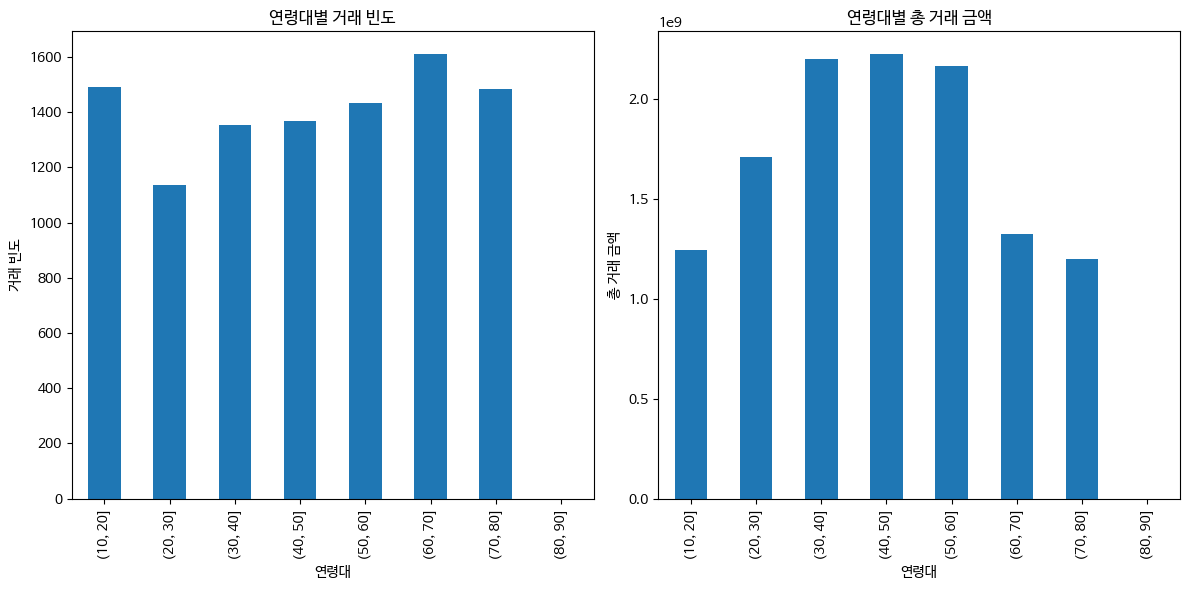

In [20]:
import matplotlib.pyplot as plt

# 1. 연령별 거래 빈도 및 거래 금액 분석
# 연령대별로 그룹화하여 거래 빈도와 총 거래 금액을 계산합니다.
age_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]
df['age_group'] = pd.cut(df['age'], bins=age_bins)

age_group_freq = df['age_group'].value_counts().sort_index()
age_group_amount = df.groupby('age_group')['amount'].sum()

# 시각화
plt.figure(figsize=(12, 6))

# 연령대별 거래 빈도
plt.subplot(1, 2, 1)
age_group_freq.plot(kind='bar')
plt.title('연령대별 거래 빈도')
plt.xlabel('연령대')
plt.ylabel('거래 빈도')

# 연령대별 평균 거래 금액
plt.subplot(1, 2, 2)
age_group_amount.plot(kind='bar')
plt.title('연령대별 총 거래 금액')
plt.xlabel('연령대')
plt.ylabel('총 거래 금액')

plt.tight_layout()
plt.show()


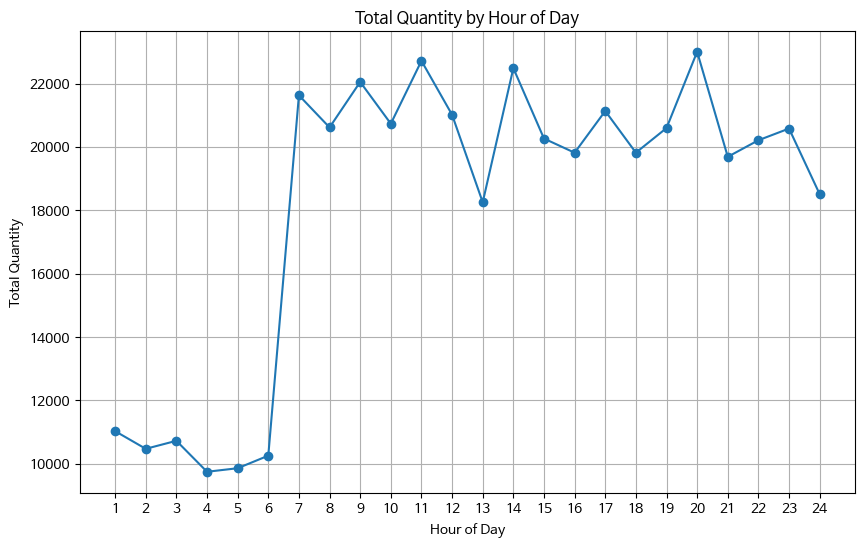

In [21]:
#인사이트 1
#1시부터 7시까지 구매수량 50% 감소
import matplotlib.pyplot as plt

time_quantity = df.groupby('time')['quantity'].sum()
plt.figure(figsize=(10, 6))
plt.plot(time_quantity.index, time_quantity.values, marker='o')
plt.title('Total Quantity by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.xticks(range(1, 25))  # 시간대를 1부터 24까지 설정
plt.show()


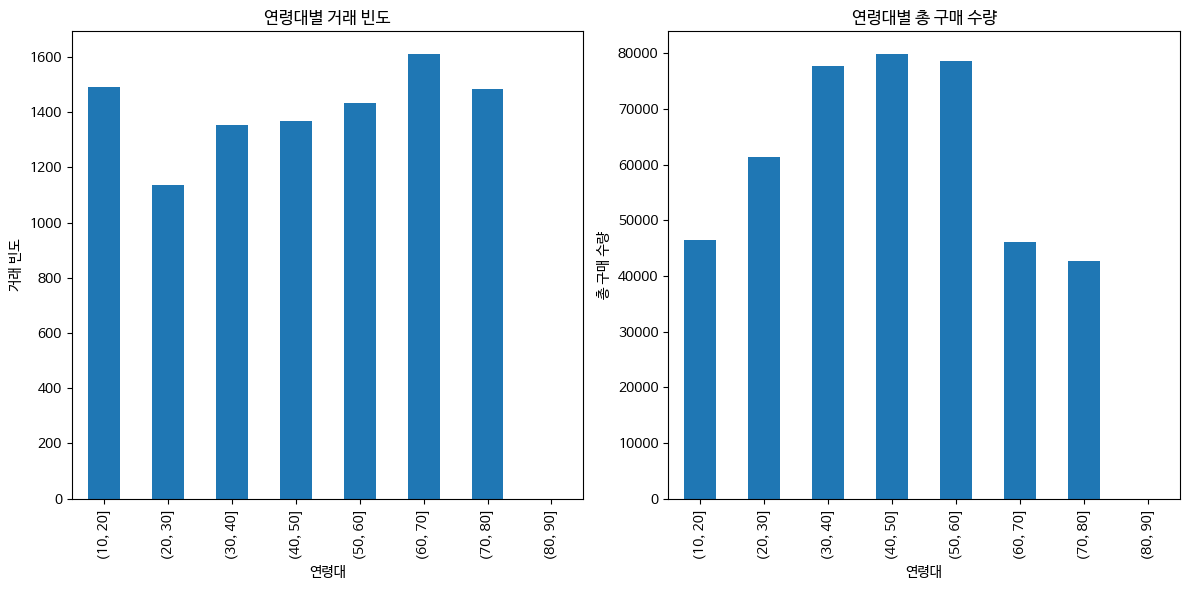

In [22]:
#인사이트 2
#60대 이상 구매 수량 50% 감소
import matplotlib.pyplot as plt

# 1. 연령별 거래 빈도 및 구매 수량 분석
# 연령대별로 그룹화하여 거래 빈도와 총 구매 수량을 계산합니다.
age_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]
df['age_group'] = pd.cut(df['age'], bins=age_bins)

age_group_freq = df['age_group'].value_counts().sort_index()
age_group_quantity = df.groupby('age_group')['quantity'].sum()

# 시각화
plt.figure(figsize=(12, 6))

# 연령대별 거래 빈도
plt.subplot(1, 2, 1)
age_group_freq.plot(kind='bar')
plt.title('연령대별 거래 빈도')
plt.xlabel('연령대')
plt.ylabel('거래 빈도')

# 연령대별 총 구매 수량
plt.subplot(1, 2, 2)
age_group_quantity.plot(kind='bar')
plt.title('연령대별 총 구매 수량')
plt.xlabel('연령대')
plt.ylabel('총 구매 수량')

plt.tight_layout()
plt.show()


Text(0, 0.5, '구매 수량')

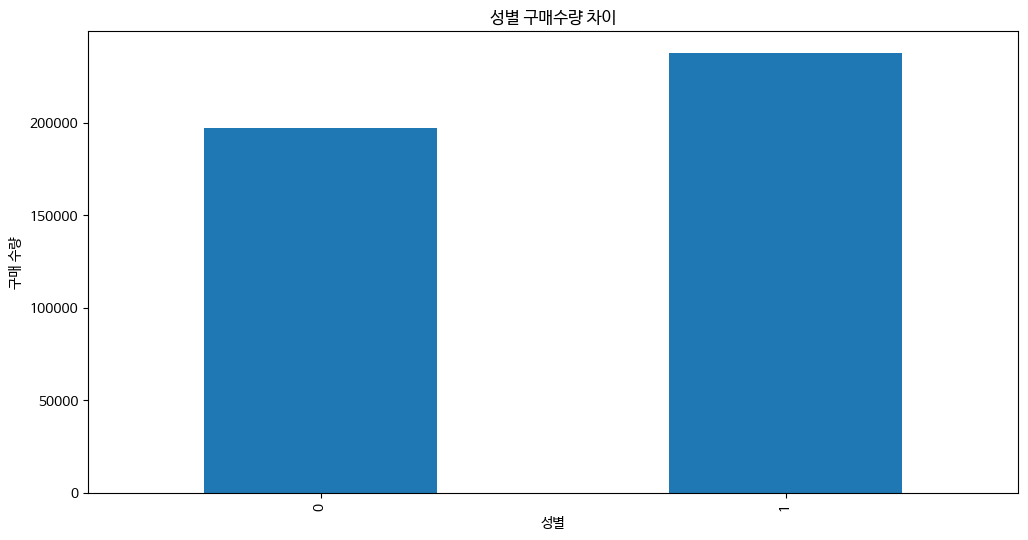

In [23]:
#인사이트 3
#여성이 남성보다 구매수량 1.2배

woman_adjust_quantity = df.groupby('gender')['quantity'].sum()

# 시각화
plt.figure(figsize=(12, 6))

# 연령대별 거래 빈도
woman_adjust_quantity.plot(kind='bar')
plt.title('성별 구매수량 차이')
plt.xlabel('성별')
plt.ylabel('구매 수량')


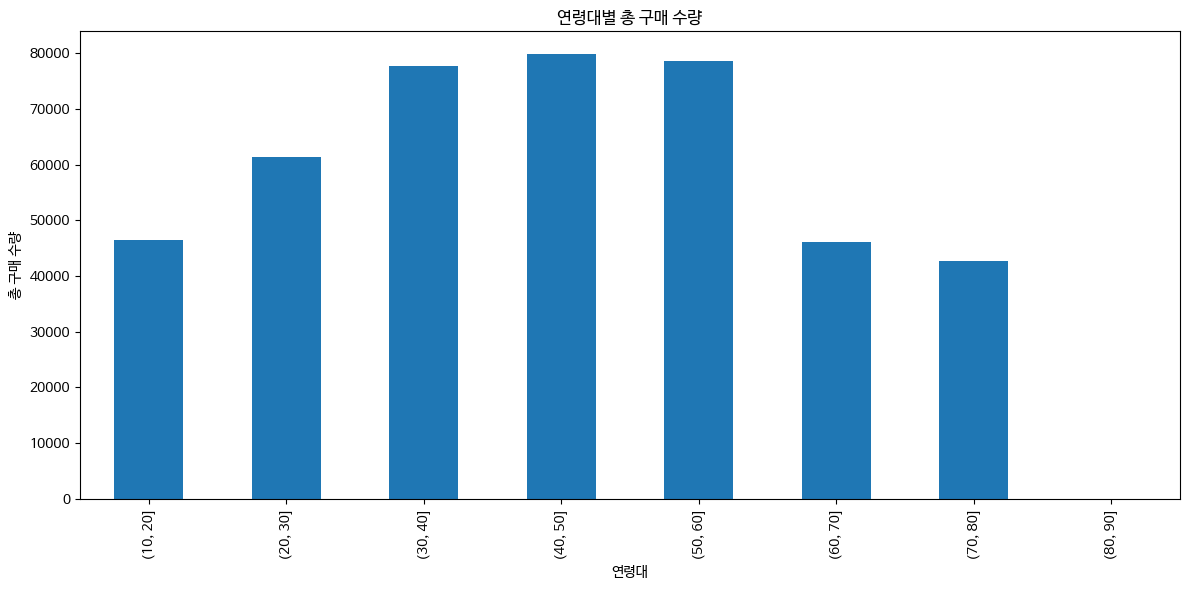

In [24]:
#인사이트 4
#16세 이하 매출액 70% 감소

age_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]
df['age_group'] = pd.cut(df['age'], bins=age_bins)

age_group_freq = df['age_group'].value_counts().sort_index()
age_group_quantity = df.groupby('age_group')['quantity'].sum()

# 시각화
plt.figure(figsize=(12, 6))

# 연령대별 총 구매 수량
age_group_quantity.plot(kind='bar')
plt.title('연령대별 총 구매 수량')
plt.xlabel('연령대')
plt.ylabel('총 구매 수량')

plt.tight_layout()
plt.show()

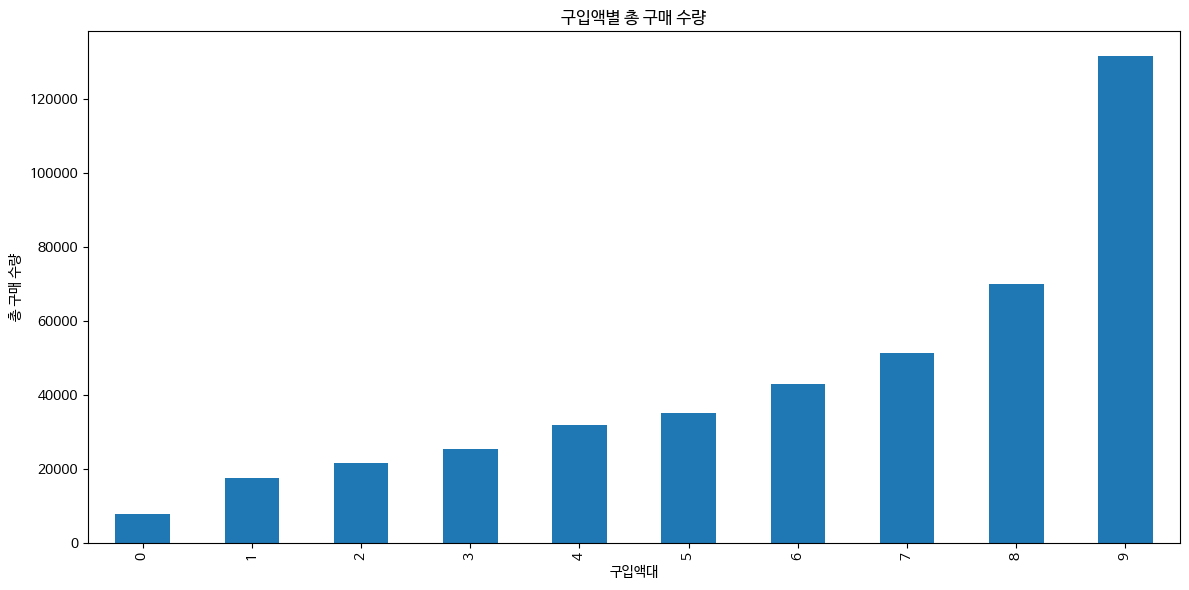

In [25]:
#인사이트 5
#구입액 상위 10% 인원이 구매수량 2배 더 많음

import matplotlib.pyplot as plt

df['quantile_amount'] = pd.qcut(df['amount'], 10, labels=False)
quantile_amount_quantity = df.groupby('quantile_amount')['quantity'].sum()

# 시각화
plt.figure(figsize=(12, 6))

# 연령대별 총 구매 수량
quantile_amount_quantity.plot(kind='bar')
plt.title('구입액별 총 구매 수량')
plt.xlabel('구입액대')
plt.ylabel('총 구매 수량')

plt.tight_layout()
plt.show()